In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10) #configurando tamanho e fonte dos gráficos
plt.rcParams.update({'font.size': 22})

# Métodos Numéricos

## Ajuste de curvas - método dos mínimos quadrados

### Patric Lacouth

In [2]:
x = np.array([1,1.5,2], dtype=float)
y = np.array([1.2,1.3,2.3], dtype=float)

In [3]:
def reta(x):
    return -0.05 + 1.1 * x

# o problema 

Dado os pontos, encontrar a reta que melhor se ajusta aos pontos

x | y
---|---
1|1.2
1.5|1.3
2|2.3

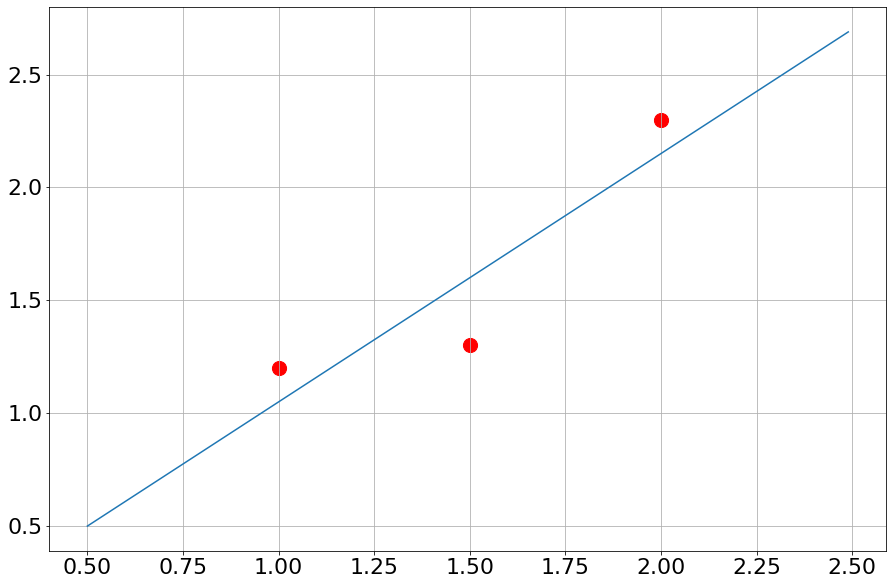

In [6]:
xa = np.arange(0.5,2.5,0.01)
ya = reta(xa)

plt.scatter(x,y,c='red',s=200)
plt.plot(xa,ya)
plt.grid(True)

# o resíduo

$$R = \sum_{i = 1}^N (f(x_i) - y_i)^2$$

$$R(a_1,a_2) = \sum_{i = 1}^N (a_1 + a_2x_i - y_i)^2$$

Observamos que  é uma forma quadrática e que seu mínimo ocorre quando suas derivadas parciais primeiras são iguais a zero, isto é,

$$\frac{\partial R}{\partial a_1} = \frac{\partial}{\partial a_1} \sum_{i = 1}^N (a_1 + a_2x_i - y_i)^2 = 0$$
$$\frac{\partial R}{\partial a_2} = \frac{\partial}{\partial a_2} \sum_{i = 1}^N (a_1 + a_2x_i - y_i)^2 = 0$$

aplicando a regra da cadeia

$$2 \sum_{i=1}^N (a_1 + a_2x_i - y_i) \cdot 1 = 0$$

$$2 \sum_{i=1}^N (a_1 + a_2x_i - y_i) \cdot x_i = 0$$


isolando as incógnitas temos

$$ a_1\sum_{i=1}^N 1 + a_2\sum_{i=1}^N x_i = \sum_{i=1}^N y_i $$
$$ a_1\sum_{i=1}^N x_i + a_2\sum_{i=1}^N x_i^2 = \sum_{i=1}^N x_i y_i $$

Observando que $\sum_{i=1}^N 1 = N $, o sistema linear acima pode ser escrito na forma matricial

$$\left[ \begin{matrix}
N & \sum_{i=1}^N x_i \\
\sum_{i=1}^N x_i & \sum_{i=1}^N x_i^2
\end{matrix} \right]
\left[ \begin{matrix}
a_{1}\\
a_{2}
\end{matrix} \right]
=
\left[ \begin{matrix}
\sum_{i=1}^N y_i\\
\sum_{i=1}^N x_i y_i\\
\end{matrix} \right]
$$

basta resolver o sistema para encontrar a reta $a_1 + a_2 x$ que melhor se adapta aos pontos

# implementando em Python
## importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Dado os pontos, encontrar a reta que melhor se ajusta aos pontos

x | y
---|---
1|1.2
1.5|1.3
2|2.3

In [2]:
xi = np.array([1,1.5,2], dtype = float)
yi = np.array([1.2,1.3,2.3], dtype = float)
xi,yi

(array([1. , 1.5, 2. ]), array([1.2, 1.3, 2.3]))

## montando o sistema

$$\left[ \begin{matrix}
N & \sum_{i=1}^N x_i \\
\sum_{i=1}^N x_i & \sum_{i=1}^N x_i^2
\end{matrix} \right]
\left[ \begin{matrix}
a_{1}\\
a_{2}
\end{matrix} \right]
=
\left[ \begin{matrix}
\sum_{i=1}^N y_i\\
\sum_{i=1}^N x_i y_i\\
\end{matrix} \right]
$$


In [3]:
N = xi.shape[0]
sum_xi = np.sum(xi)
sum_xi2 = np.sum(xi ** 2)
sum_yi = np.sum(yi)
sum_xiyi = np.sum(xi * yi)

A = np.array([[N,sum_xi],[sum_xi,sum_xi2]], dtype = float)
b = np.array([sum_yi,sum_xiyi], dtype = float)
A,b


(array([[3.  , 4.5 ],
        [4.5 , 7.25]]), array([4.8 , 7.75]))

# resolvendo o sistema

In [6]:
x = np.linalg.solve(A,b)
x

array([-0.05,  1.1 ])

# criando a função da reta

In [7]:
x

array([-0.05,  1.1 ])

In [8]:
def reta(x):
    return -0.05 + 1.1 * x

# traçando o gráfico

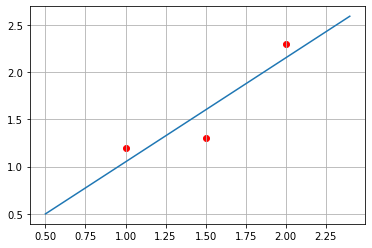

In [11]:
xa = np.arange(0.5, 2.5, 0.1)
ya = reta(xa)

plt.plot(xa,ya)
plt.scatter(xi,yi,c='red')

plt.grid(True)

# now, go code!